In [ ]:
!pip install datasets

In [ ]:
!pip install transformers

In [3]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm
from datasets import load_dataset
from transformers import AutoImageProcessor, DPTModel
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the dataset
dataset = load_dataset("huggingface/cats-image")

# Load the models
image_processor = AutoImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTModel.from_pretrained("Intel/dpt-large")

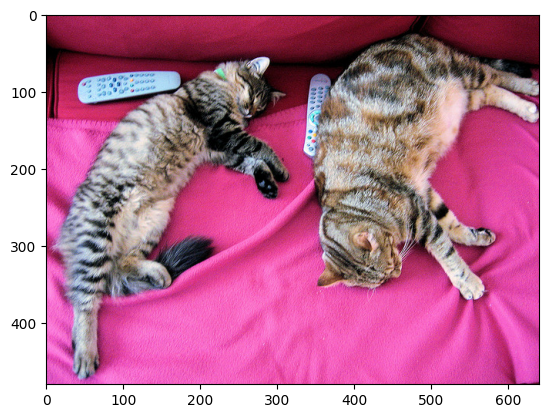

In [ ]:
# Open an image and show it
image = dataset["test"]["image"][0]

plt.imshow(image)

In [ ]:
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

encoding_image_1 = outputs.pooler_output
list(encoding_image_1.shape)

[1, 1024]

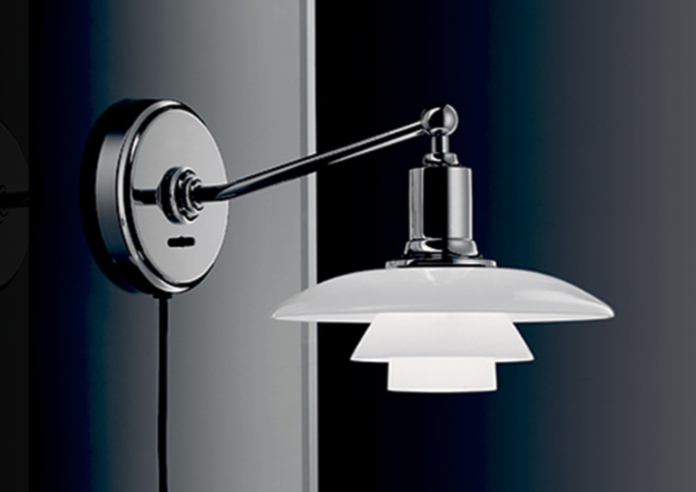

In [ ]:
# open method used to open different extension image file
image2 = Image.open(r"/content/Louis Poulsen.png") 
image2 = image2.convert('RGB')
  
# This method will show image in any image viewer 
image2.show() 

In [ ]:
inputs2 = image_processor(image2, return_tensors="pt")

with torch.no_grad():
    outputs2 = model(**inputs2)

encoding_image_2 = outputs2.pooler_output
list(encoding_image_2.shape)

[1, 1024]

In [ ]:
# Let's compare the 2 encoding using cosine similarity
similarity = cosine_similarity(encoding_image_1, encoding_image_2)
similarity[0][0]

0.15564162

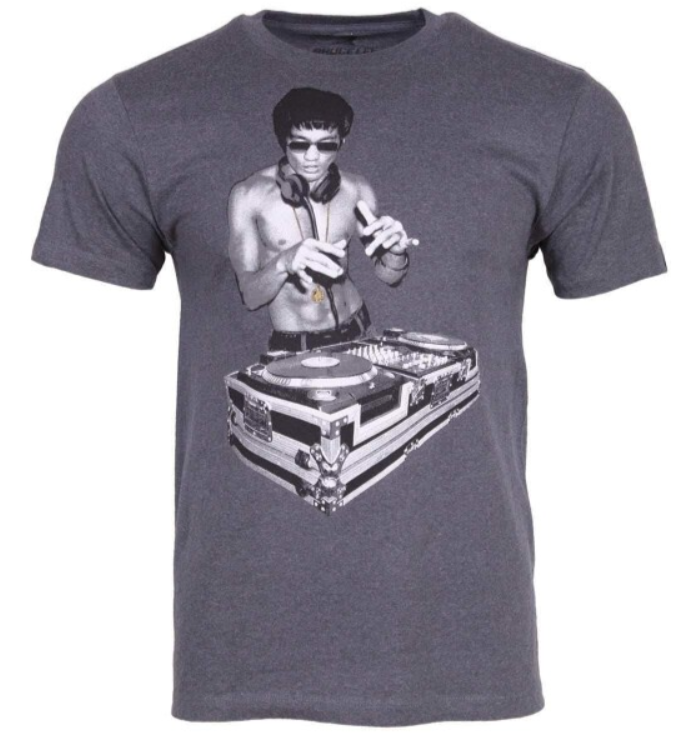

In [ ]:
# open method used to open different extension image file
image3 = Image.open(r"/content/DJ DRAGON CLASSIC HEATHER NAVY T-SHIRT.png") 
image3 = image3.convert('RGB')
  
# This method will show image in any image viewer 
image3.show() 

In [ ]:
inputs3 = image_processor(image3, return_tensors="pt")

with torch.no_grad():
    outputs3 = model(**inputs3)

encoding_image_3 = outputs3.pooler_output
list(encoding_image_3.shape)

[1, 1024]

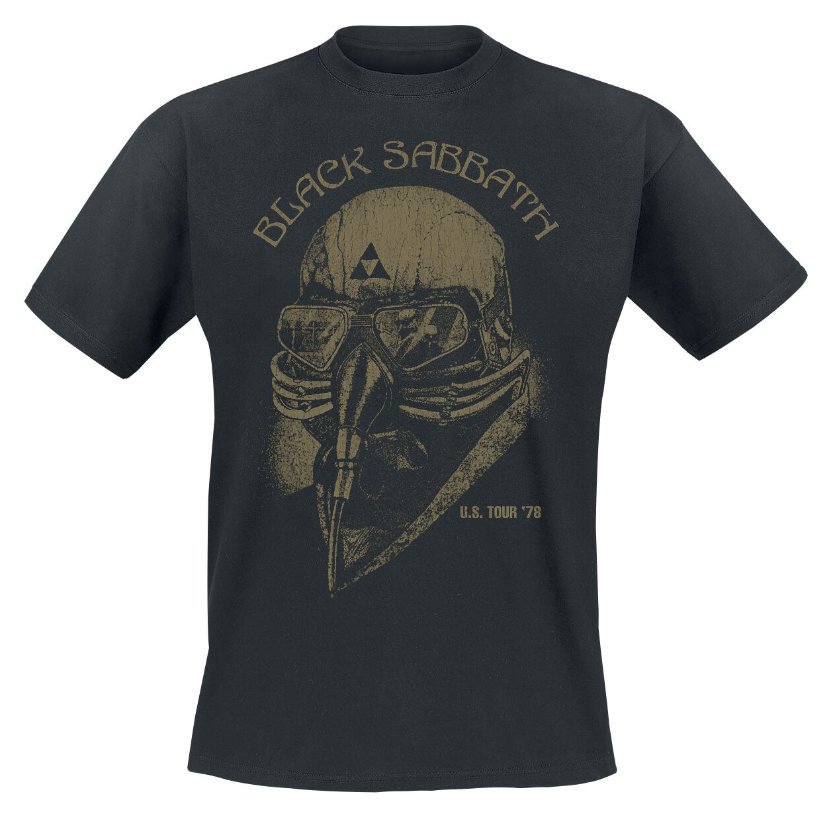

In [ ]:
# open method used to open different extension image file
image4 = Image.open(r"/content/US Tour '78 T-Shirt nero  Black Sabbath.png") 
image4 = image4.convert('RGB')
  
# This method will show image in any image viewer 
image4.show() 

In [ ]:
inputs4 = image_processor(image4, return_tensors="pt")

with torch.no_grad():
    outputs4 = model(**inputs4)

encoding_image_4 = outputs4.pooler_output
list(encoding_image_4.shape)

[1, 1024]

In [ ]:
# Let's compare the 2 encoding using cosine similarity
similarity = cosine_similarity(encoding_image_3, encoding_image_4)
similarity[0][0]

0.5304672

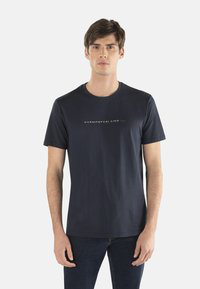

In [ ]:
# open method used to open different extension image file
image5 = Image.open(r"3.jpg") 
image5 = image5.convert('RGB')
  
# This method will show image in any image viewer 
image5.show() 

In [ ]:
inputs5 = image_processor(image5, return_tensors="pt")

with torch.no_grad():
    outputs5 = model(**inputs5)

encoding_image_5 = outputs5.pooler_output
list(encoding_image_5.shape)

[1, 1024]

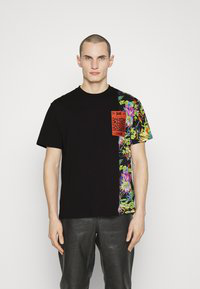

In [ ]:
# open method used to open different extension image file
image6 = Image.open(r"4.jpg") 
image6 = image6.convert('RGB')
  
# This method will show image in any image viewer 
image6.show() 

In [ ]:
inputs6 = image_processor(image6, return_tensors="pt")

with torch.no_grad():
    outputs6 = model(**inputs6)

encoding_image_6 = outputs6.pooler_output
list(encoding_image_6.shape)

[1, 1024]

In [ ]:
# Let's compare the 2 encoding using cosine similarity
similarity = cosine_similarity(encoding_image_5, encoding_image_6)
similarity[0][0]

0.51011556

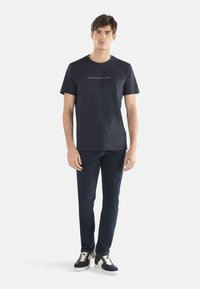

In [ ]:
# open method used to open different extension image file
image7 = Image.open(r"1.jpg") 
image7 = image7.convert('RGB')
  
# This method will show image in any image viewer 
image7.show() 

In [ ]:
inputs7 = image_processor(image7, return_tensors="pt")

with torch.no_grad():
    outputs7 = model(**inputs7)

encoding_image_7 = outputs7.pooler_output
list(encoding_image_7.shape)

[1, 1024]

In [ ]:
# Let's compare the 2 encoding using cosine similarity
similarity = cosine_similarity(encoding_image_5, encoding_image_7)
similarity[0][0]

0.7243103

## Let's try on the detected images

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


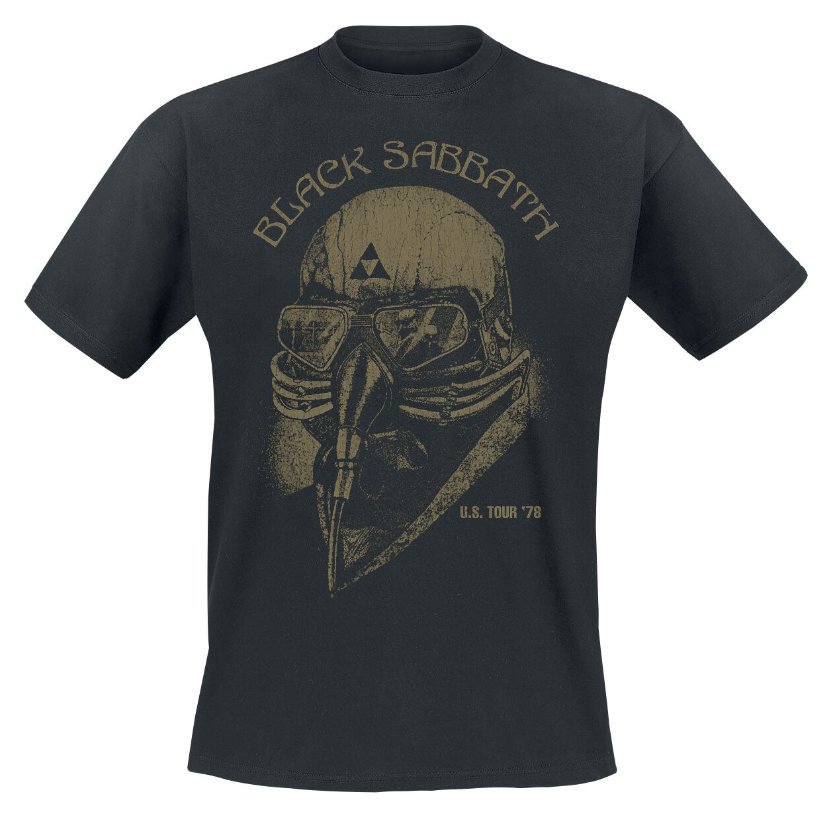

In [7]:
reference_image = Image.open(r"/content/drive/MyDrive/Multidisciplinary Project/Product_images/US Tour '78 T-Shirt nero  Black Sabbath.png") 
reference_image = reference_image.convert('RGB')
  
reference_image.show() 

In [8]:
def get_image_encoding(image):
  # Process the input image
  inputs = image_processor(image, return_tensors="pt")

  with torch.no_grad():
      outputs = model(**inputs)

  # Get the ouput of the pooling layer
  image_encoding = outputs.pooler_output

  return image_encoding

def get_image(path):
  image = Image.open(path) 
  image = image.convert('RGB')
  return image

In [9]:
# Get the encoding of the reference image
reference_encoding = get_image_encoding(reference_image)

In [13]:
# Save in a list all the images
detected_images_path = "/content/drive/MyDrive/Multidisciplinary Project/Detected_images/Detected Images"

images = []

for image_name in tqdm(os.listdir(detected_images_path)):
  # If it's a detecte image and not the entire frame
  if image_name[-6] == "_":
    image = get_image(f"{detected_images_path}/{image_name}")
    images.append(image)

100%|██████████| 2391/2391 [00:54<00:00, 43.91it/s] 


In [14]:
print(f"The number of detected images is {len(images)}")

The number of detected images is 1370


92it [07:26,  4.86s/it]


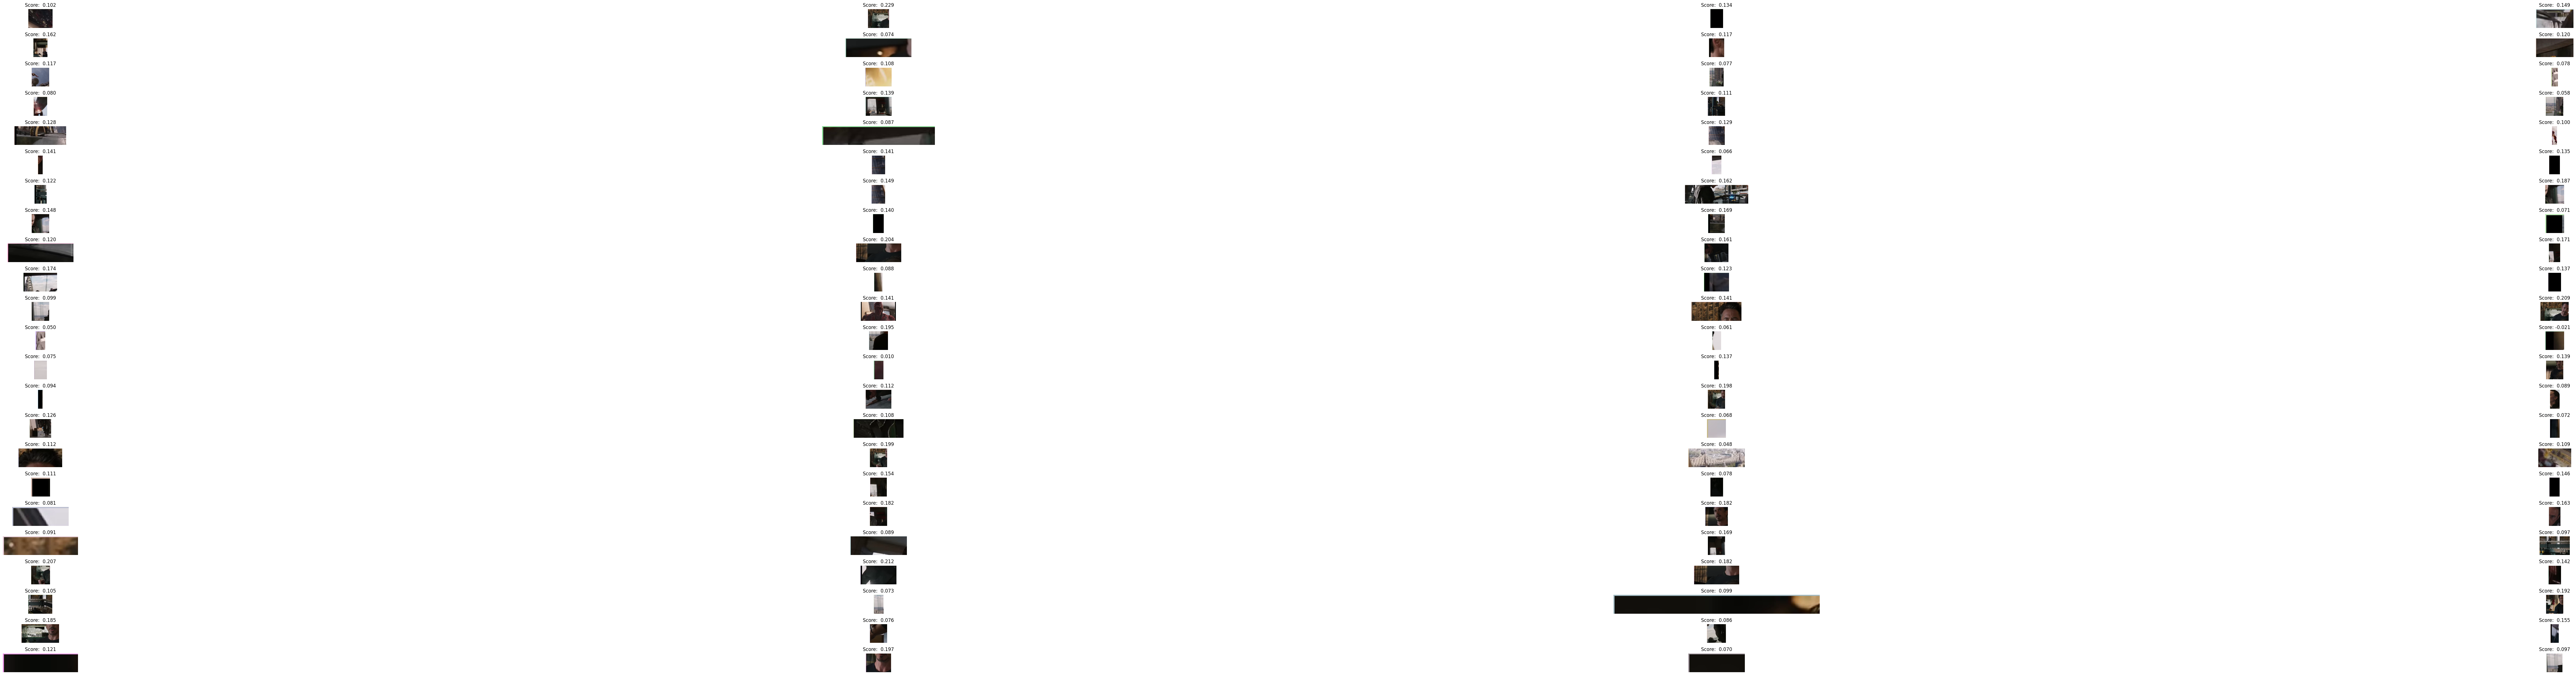

In [21]:
scores = []

image_subset = images[::15]

# Create a subplot grid dynamically based on the number of images
num_images = len(image_subset)
num_cols = 4  # Number of columns in the grid
num_rows = (num_images + num_cols - 1) // num_cols  # Number of rows in the grid

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_rows*6, num_cols*6))

# Iterate over the image files and plot the images
for i, image in tqdm(enumerate(image_subset)):
    # Calculate the row and column index of the subplot
    row = i // num_cols
    col = i % num_cols

    # Get the encoding of the image
    image_encoding = get_image_encoding(image)
    # Compute the cosine similarity
    score = cosine_similarity(reference_encoding, image_encoding)[0][0]
    scores.append(score)

    # Plot the image in the corresponding subplot
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title(f"Score: {score: .3f}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()